In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [ ]:
data=pd.read_csv('WEATHER_INDEX.csv')


In [ ]:
data.head()

,Year,Ampara Maha Total Rainfall,Ampara Maha Average Of Max Temp,Ampara Maha Adjusted Yield (kg/ha),Anuradhapura Yala Total Rainfall,Anuradhapura Yala Adjusted Yield (kg/ha),Polonnaruwa Yala Total Rainfall,Polonnaruwa Yala Adjusted Yield (kg/ha)
0,1993,1089.462857,28.274506,3571.516992,328.947,3140.306004,362.5175,4401.712007
1,1994,371.062143,29.688188,3148.807948,315.933,3194.388023,306.2625,4460.592045
2,1995,175.067857,30.709065,3510.366036,98.603,3296.077963,94.4525,4279.905911
3,1996,168.327143,31.077428,3814.706016,160.265,3641.816041,191.6225,4117.465994
4,1997,674.087857,29.662127,4055.488003,284.688,3584.925020,410.1050,4295.983006



Linear Regression Results:

                                    OLS Regression Results                                    
Dep. Variable:     Ampara Maha Adjusted Yield (kg/ha)   R-squared:                       0.233
Model:                                            OLS   Adj. R-squared:                  0.206
Method:                                 Least Squares   F-statistic:                     8.792
Date:                                Wed, 19 Mar 2025   Prob (F-statistic):            0.00600
Time:                                        09:16:28   Log-Likelihood:                -231.20
No. Observations:                                  31   AIC:                             466.4
Df Residuals:                                      29   BIC:                             469.3
Df Model:                                           1                                         
Covariance Type:                            nonrobust                                         
                     

<ipython-input-15-079b04abe45e>:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("a = {:.4f}, Std Error = {:.4f}, t-value = {:.4f}, p-value = {:.4f}\n".format(a, std_err[0], t_values[0], p_values[0]))
<ipython-input-15-079b04abe45e>:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("b = {:.4f}, Std Error = {:.4f}, t-value = {:.4f}, p-value = {:.4f}\n".format(b, std_err[1], t_values[1], p_values[1]))


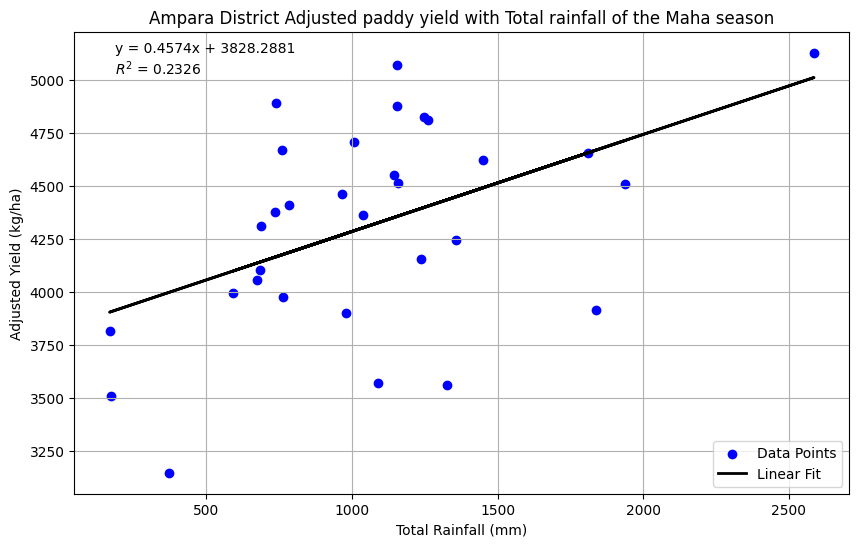

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import r2_score

# Define the features (X) and target (y) variables
X = data['Ampara Maha Total Rainfall']  # Independent variable (Precipitation)
y = data['Ampara Maha Adjusted Yield (kg/ha)']  # Dependent variable (Rice Yield)

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Make predictions
predictions = model.predict(X)

# Extract regression coefficients
a, b = model.params  # Intercept and slope
std_err = model.bse  # Standard Errors
t_values = model.tvalues  # t-values
p_values = model.pvalues  # p-values

# Calculate R-squared manually
r_squared = r2_score(y, predictions)

# Print regression results with line breaks for clarity
print("\nLinear Regression Results:\n")
print(model.summary())

print("\nEquation: y = {:.4f}x + {:.4f}\n".format(b, a))
print("R² = {:.4f}\n".format(r_squared))
print("a = {:.4f}, Std Error = {:.4f}, t-value = {:.4f}, p-value = {:.4f}\n".format(a, std_err[0], t_values[0], p_values[0]))
print("b = {:.4f}, Std Error = {:.4f}, t-value = {:.4f}, p-value = {:.4f}\n".format(b, std_err[1], t_values[1], p_values[1]))

# Increase plot size
plt.figure(figsize=(10, 6))  # Increased figure size

# Plot the regression line
plt.scatter(X['Ampara Maha Total Rainfall'], y, color='blue', label='Data Points')
plt.plot(X['Ampara Maha Total Rainfall'], predictions, color='black', linewidth=2, label='Linear Fit')

# Display equation and R² value with a smaller font size
eq_text = f"y = {b:.4f}x + {a:.4f}\n$R^2$ = {r_squared:.4f}"
plt.text(X['Ampara Maha Total Rainfall'].min() + 20, y.max() - 100, eq_text, fontsize=10, color="black")  # Reduced fontsize

# Labels and title
plt.xlabel("Total Rainfall (mm)")
plt.ylabel("Adjusted Yield (kg/ha)")
plt.title("Ampara District Adjusted paddy yield with Total rainfall of the Maha season")
plt.legend()
plt.grid(True)

# Show plot
plt.show()



Linear Regression Results:

                                    OLS Regression Results                                    
Dep. Variable:     Ampara Maha Adjusted Yield (kg/ha)   R-squared:                       0.149
Model:                                            OLS   Adj. R-squared:                  0.119
Method:                                 Least Squares   F-statistic:                     5.069
Date:                                Wed, 19 Mar 2025   Prob (F-statistic):             0.0321
Time:                                        09:16:28   Log-Likelihood:                -232.81
No. Observations:                                  31   AIC:                             469.6
Df Residuals:                                      29   BIC:                             472.5
Df Model:                                           1                                         
Covariance Type:                            nonrobust                                         
                     

<ipython-input-16-88da4149aefb>:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("a = {:.4f}, Std Error = {:.4f}, t-value = {:.4f}, p-value = {:.4f}\n".format(a, std_err[0], t_values[0], p_values[0]))
<ipython-input-16-88da4149aefb>:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("b = {:.4f}, Std Error = {:.4f}, t-value = {:.4f}, p-value = {:.4f}\n".format(b, std_err[1], t_values[1], p_values[1]))


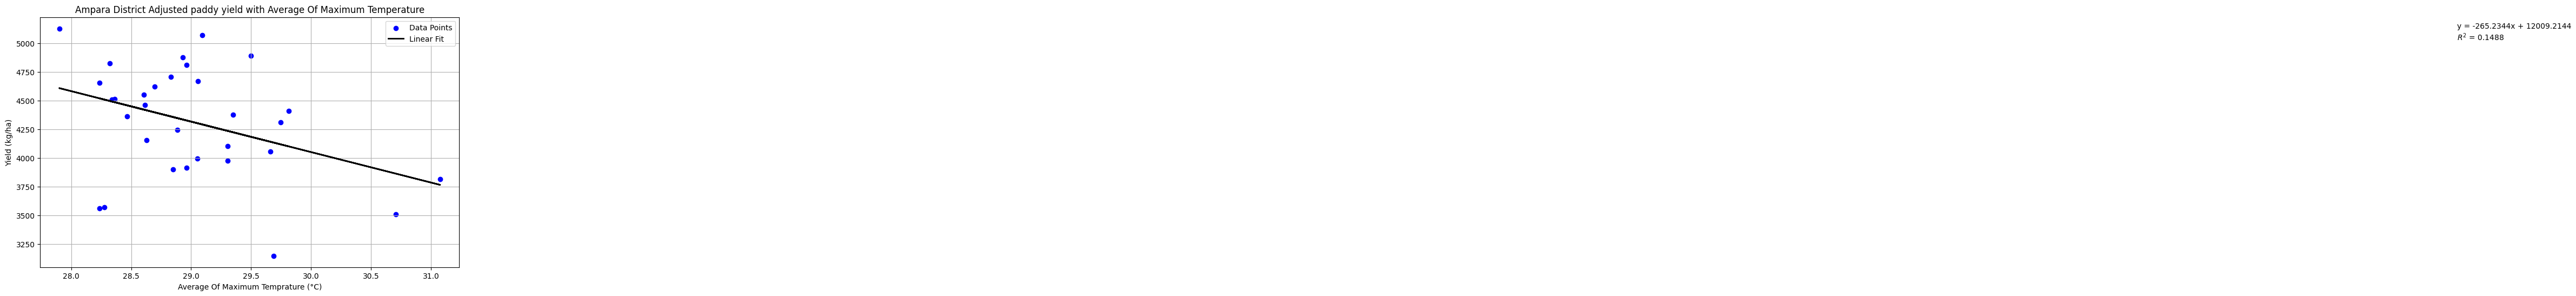

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import r2_score

# Define the features (X) and target (y) variables
X = data['Ampara Maha Average Of Max Temp']  # Independent variable (Precipitation)
y = data['Ampara Maha Adjusted Yield (kg/ha)']  # Dependent variable (Rice Yield)

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Make predictions
predictions = model.predict(X)

# Extract regression coefficients
a, b = model.params  # Intercept and slope
std_err = model.bse  # Standard Errors
t_values = model.tvalues  # t-values
p_values = model.pvalues  # p-values

# Calculate R-squared manually
r_squared = r2_score(y, predictions)

# Print regression results with line breaks for clarity
print("\nLinear Regression Results:\n")
print(model.summary())

print("\nEquation: y = {:.4f}x + {:.4f}\n".format(b, a))
print("R² = {:.4f}\n".format(r_squared))
print("a = {:.4f}, Std Error = {:.4f}, t-value = {:.4f}, p-value = {:.4f}\n".format(a, std_err[0], t_values[0], p_values[0]))
print("b = {:.4f}, Std Error = {:.4f}, t-value = {:.4f}, p-value = {:.4f}\n".format(b, std_err[1], t_values[1], p_values[1]))

# Increase plot size
plt.figure(figsize=(10, 6))  # Increased figure size

# Plot the regression line
plt.scatter(X['Ampara Maha Average Of Max Temp'], y, color='blue', label='Data Points')
plt.plot(X['Ampara Maha Average Of Max Temp'], predictions, color='black', linewidth=2, label='Linear Fit')

# Display equation and R² value with a smaller font size
eq_text = f"y = {b:.4f}x + {a:.4f}\n$R^2$ = {r_squared:.4f}"
plt.text(X['Ampara Maha Average Of Max Temp'].min() + 20, y.max() - 100, eq_text, fontsize=10, color="black")  # Reduced fontsize

# Labels and title
plt.xlabel("Average Of Maximum Temprature (°C)")
plt.ylabel("Yield (kg/ha)")
plt.title("Ampara District Adjusted paddy yield with Average Of Maximum Temperature")
plt.legend()
plt.grid(True)

# Show plot
plt.show()



Quadratic Regression Results:

                                    OLS Regression Results                                    
Dep. Variable:     Ampara Maha Adjusted Yield (kg/ha)   R-squared:                       0.262
Model:                                            OLS   Adj. R-squared:                  0.209
Method:                                 Least Squares   F-statistic:                     4.959
Date:                                Wed, 19 Mar 2025   Prob (F-statistic):             0.0143
Time:                                        09:16:28   Log-Likelihood:                -230.60
No. Observations:                                  31   AIC:                             467.2
Df Residuals:                                      28   BIC:                             471.5
Df Model:                                           2                                         
Covariance Type:                            nonrobust                                         
                 c

<ipython-input-17-fefad4543608>:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Intercept (a) = {:.4f}, Std Error = {:.4f}, t-value = {:.4f}, p-value = {:.4f}\n".format(a, std_err[0], t_values[0], p_values[0]))
<ipython-input-17-fefad4543608>:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Linear Coeff (b) = {:.4f}, Std Error = {:.4f}, t-value = {:.4f}, p-value = {:.4f}\n".format(b, std_err[1], t_values[1], p_values[1]))
<ipython-input-17-fefad4543608>:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

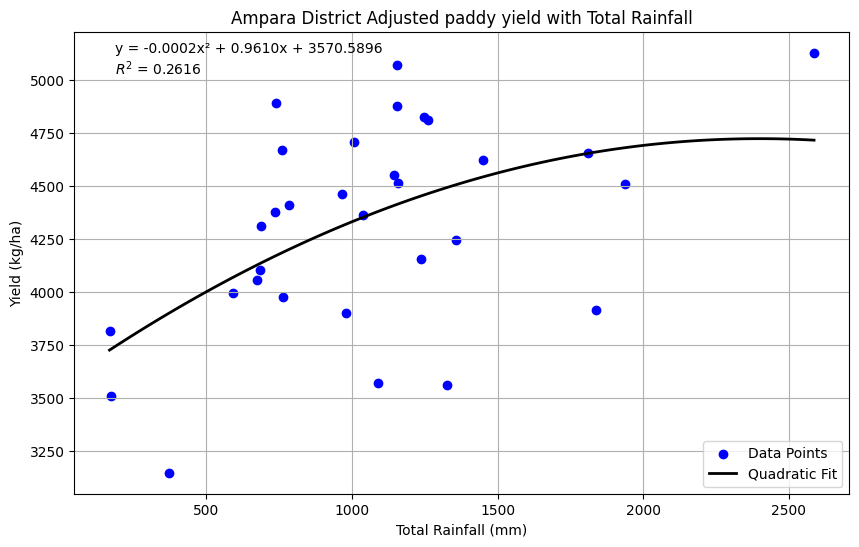

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import r2_score

# Define the features (X) and target (y) variables
X = data['Ampara Maha Total Rainfall']  # Independent variable (Precipitation)
y = data['Ampara Maha Adjusted Yield (kg/ha)']  # Dependent variable (Rice Yield)

# Create quadratic term (X^2)
X_quad = X ** 2

# Combine features into a DataFrame
X_df = pd.DataFrame({'Rainfall': X, 'Rainfall^2': X_quad})

# Add a constant term for the intercept
X_df = sm.add_constant(X_df)

# Fit the quadratic regression model
model = sm.OLS(y, X_df).fit()

# Make predictions
predictions = model.predict(X_df)

# Extract regression coefficients
a, b, c = model.params  # Intercept, linear term, quadratic term
std_err = model.bse  # Standard Errors
t_values = model.tvalues  # t-values
p_values = model.pvalues  # p-values

# Calculate R-squared manually
r_squared = r2_score(y, predictions)

# Print regression results with line breaks for clarity
print("\nQuadratic Regression Results:\n")
print(model.summary())

print("\nEquation: y = {:.4f}x² + {:.4f}x + {:.4f}\n".format(c, b, a))
print("R² = {:.4f}\n".format(r_squared))
print("Intercept (a) = {:.4f}, Std Error = {:.4f}, t-value = {:.4f}, p-value = {:.4f}\n".format(a, std_err[0], t_values[0], p_values[0]))
print("Linear Coeff (b) = {:.4f}, Std Error = {:.4f}, t-value = {:.4f}, p-value = {:.4f}\n".format(b, std_err[1], t_values[1], p_values[1]))
print("Quadratic Coeff (c) = {:.4f}, Std Error = {:.4f}, t-value = {:.4f}, p-value = {:.4f}\n".format(c, std_err[2], t_values[2], p_values[2]))

# Increase plot size
plt.figure(figsize=(10, 6))  # Increased figure size

# Scatter plot of data points
plt.scatter(X, y, color='blue', label='Data Points')

# Sort X values for smooth curve
X_sorted = np.linspace(X.min(), X.max(), 100)
X_sorted_df = pd.DataFrame({'Rainfall': X_sorted, 'Rainfall^2': X_sorted ** 2})
X_sorted_df = sm.add_constant(X_sorted_df)

# Predicted quadratic regression line
plt.plot(X_sorted, model.predict(X_sorted_df), color='black', linewidth=2, label='Quadratic Fit')

# Display equation and R² value with a smaller font size
eq_text = f"y = {c:.4f}x² + {b:.4f}x + {a:.4f}\n$R^2$ = {r_squared:.4f}"
plt.text(X.min() + 20, y.max() - 100, eq_text, fontsize=10, color="black")  # Reduced fontsize

# Labels and title
plt.xlabel("Total Rainfall (mm)")
plt.ylabel("Yield (kg/ha)")
plt.title("Ampara District Adjusted paddy yield with Total Rainfall")
plt.legend()
plt.grid(True)

# Show plot
plt.show()



Quadratic Regression Results:

                                    OLS Regression Results                                    
Dep. Variable:     Ampara Maha Adjusted Yield (kg/ha)   R-squared:                       0.159
Model:                                            OLS   Adj. R-squared:                  0.099
Method:                                 Least Squares   F-statistic:                     2.644
Date:                                Wed, 19 Mar 2025   Prob (F-statistic):             0.0888
Time:                                        09:16:29   Log-Likelihood:                -232.62
No. Observations:                                  31   AIC:                             471.2
Df Residuals:                                      28   BIC:                             475.5
Df Model:                                           2                                         
Covariance Type:                            nonrobust                                         
                 c

<ipython-input-18-b67d0fb56e03>:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Intercept (a) = {:.4f}, Std Error = {:.4f}, t-value = {:.4f}, p-value = {:.4f}\n".format(a, std_err[0], t_values[0], p_values[0]))
<ipython-input-18-b67d0fb56e03>:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Linear Coeff (b) = {:.4f}, Std Error = {:.4f}, t-value = {:.4f}, p-value = {:.4f}\n".format(b, std_err[1], t_values[1], p_values[1]))
<ipython-input-18-b67d0fb56e03>:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

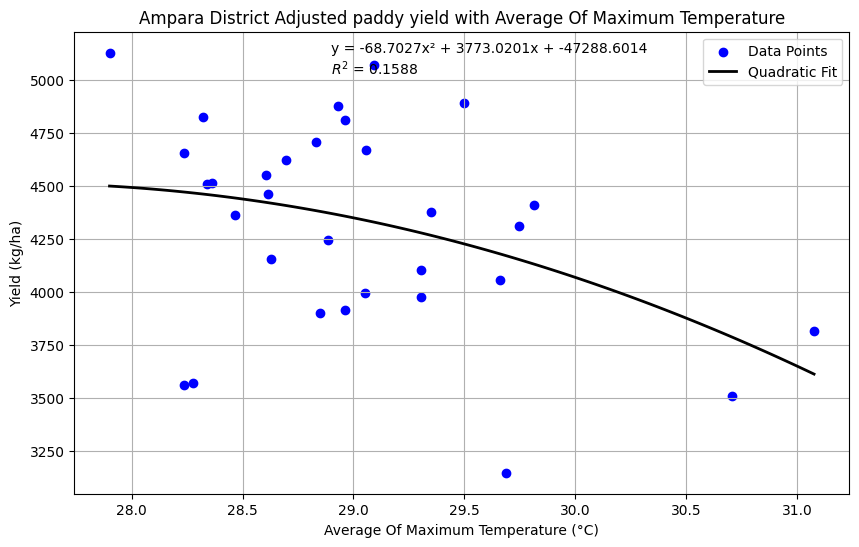

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import r2_score

# Define the features (X) and target (y) variables
X = data['Ampara Maha Average Of Max Temp']  # Independent variable (Temperature)
y = data['Ampara Maha Adjusted Yield (kg/ha)']  # Dependent variable (Rice Yield)

# Create quadratic term (X^2)
X_quad = X ** 2

# Combine features into a DataFrame
X_df = pd.DataFrame({'Temp': X, 'Temp^2': X_quad})

# Add a constant term for the intercept
X_df = sm.add_constant(X_df)

# Fit the quadratic regression model
model = sm.OLS(y, X_df).fit()

# Make predictions
predictions = model.predict(X_df)

# Extract regression coefficients
a, b, c = model.params  # Intercept, linear term, quadratic term
std_err = model.bse  # Standard Errors
t_values = model.tvalues  # t-values
p_values = model.pvalues  # p-values

# Calculate R-squared manually
r_squared = r2_score(y, predictions)

# Print regression results with line breaks for clarity
print("\nQuadratic Regression Results:\n")
print(model.summary())

print("\nEquation: y = {:.4f}x² + {:.4f}x + {:.4f}\n".format(c, b, a))
print("R² = {:.4f}\n".format(r_squared))
print("Intercept (a) = {:.4f}, Std Error = {:.4f}, t-value = {:.4f}, p-value = {:.4f}\n".format(a, std_err[0], t_values[0], p_values[0]))
print("Linear Coeff (b) = {:.4f}, Std Error = {:.4f}, t-value = {:.4f}, p-value = {:.4f}\n".format(b, std_err[1], t_values[1], p_values[1]))
print("Quadratic Coeff (c) = {:.4f}, Std Error = {:.4f}, t-value = {:.4f}, p-value = {:.4f}\n".format(c, std_err[2], t_values[2], p_values[2]))

# Increase plot size
plt.figure(figsize=(10, 6))  # Increased figure size

# Scatter plot of data points
plt.scatter(X, y, color='blue', label='Data Points')

# Sort X values for smooth curve
X_sorted = np.linspace(X.min(), X.max(), 100)
X_sorted_df = pd.DataFrame({'Temp': X_sorted, 'Temp^2': X_sorted ** 2})
X_sorted_df = sm.add_constant(X_sorted_df)

# Predicted quadratic regression line
plt.plot(X_sorted, model.predict(X_sorted_df), color='black', linewidth=2, label='Quadratic Fit')

# Display equation and R² value with a smaller font size
eq_text = f"y = {c:.4f}x² + {b:.4f}x + {a:.4f}\n$R^2$ = {r_squared:.4f}"
plt.text(X.min() + 1, y.max() - 100, eq_text, fontsize=10, color="black")  # Adjusted position

# Labels and title
plt.xlabel("Average Of Maximum Temperature (°C)")
plt.ylabel("Yield (kg/ha)")
plt.title("Ampara District Adjusted paddy yield with Average Of Maximum Temperature")
plt.legend()
plt.grid(True)

# Show plot
plt.show()



Linear Regression Results:

                                       OLS Regression Results                                       
Dep. Variable:     Anuradhapura Yala Adjusted Yield (kg/ha)   R-squared:                       0.240
Model:                                                  OLS   Adj. R-squared:                  0.214
Method:                                       Least Squares   F-statistic:                     9.182
Date:                                      Wed, 19 Mar 2025   Prob (F-statistic):            0.00510
Time:                                              09:16:29   Log-Likelihood:                -231.93
No. Observations:                                        31   AIC:                             467.9
Df Residuals:                                            29   BIC:                             470.7
Df Model:                                                 1                                         
Covariance Type:                                  nonrobust   

<ipython-input-19-1e2e96110926>:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("a = {:.4f}, Std Error = {:.4f}, t-value = {:.4f}, p-value = {:.4f}\n".format(a, std_err[0], t_values[0], p_values[0]))
<ipython-input-19-1e2e96110926>:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("b = {:.4f}, Std Error = {:.4f}, t-value = {:.4f}, p-value = {:.4f}\n".format(b, std_err[1], t_values[1], p_values[1]))


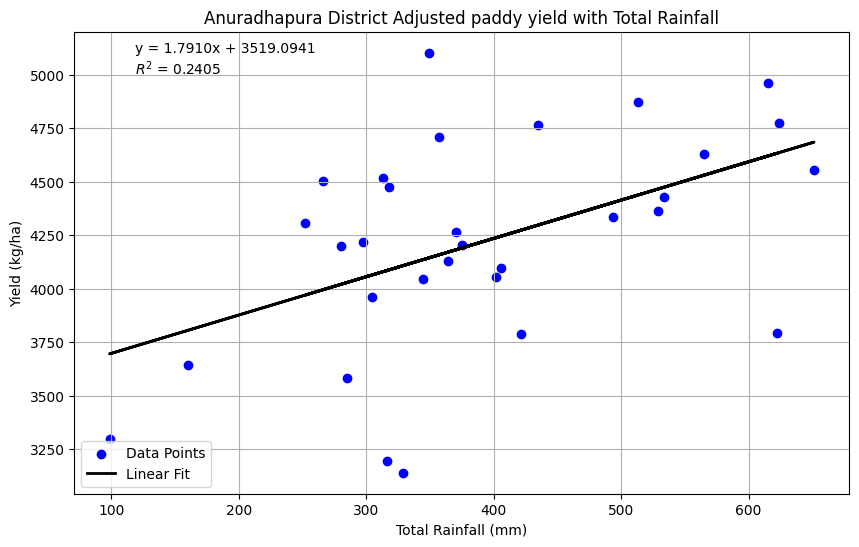

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import r2_score

# Define the features (X) and target (y) variables
X = data['Anuradhapura Yala Total Rainfall']  # Independent variable (Precipitation)
y = data['Anuradhapura Yala Adjusted Yield (kg/ha)']  # Dependent variable (Rice Yield)

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Make predictions
predictions = model.predict(X)

# Extract regression coefficients
a, b = model.params  # Intercept and slope
std_err = model.bse  # Standard Errors
t_values = model.tvalues  # t-values
p_values = model.pvalues  # p-values

# Calculate R-squared manually
r_squared = r2_score(y, predictions)

# Print regression results with line breaks for clarity
print("\nLinear Regression Results:\n")
print(model.summary())

print("\nEquation: y = {:.4f}x + {:.4f}\n".format(b, a))
print("R² = {:.4f}\n".format(r_squared))
print("a = {:.4f}, Std Error = {:.4f}, t-value = {:.4f}, p-value = {:.4f}\n".format(a, std_err[0], t_values[0], p_values[0]))
print("b = {:.4f}, Std Error = {:.4f}, t-value = {:.4f}, p-value = {:.4f}\n".format(b, std_err[1], t_values[1], p_values[1]))

# Increase plot size
plt.figure(figsize=(10, 6))  # Increased figure size

# Plot the regression line
plt.scatter(X['Anuradhapura Yala Total Rainfall'], y, color='blue', label='Data Points')
plt.plot(X['Anuradhapura Yala Total Rainfall'], predictions, color='black', linewidth=2, label='Linear Fit')

# Display equation and R² value with a smaller font size
eq_text = f"y = {b:.4f}x + {a:.4f}\n$R^2$ = {r_squared:.4f}"
plt.text(X['Anuradhapura Yala Total Rainfall'].min() + 20, y.max() - 100, eq_text, fontsize=10, color="black")  # Adjusted position

# Labels and title
plt.xlabel("Total Rainfall (mm)")
plt.ylabel("Yield (kg/ha)")
plt.title("Anuradhapura District Adjusted paddy yield with Total Rainfall")
plt.legend()
plt.grid(True)

# Show plot
plt.show()



Quadratic Regression Results:

                                       OLS Regression Results                                       
Dep. Variable:     Anuradhapura Yala Adjusted Yield (kg/ha)   R-squared:                       0.267
Model:                                                  OLS   Adj. R-squared:                  0.215
Method:                                       Least Squares   F-statistic:                     5.097
Date:                                      Wed, 19 Mar 2025   Prob (F-statistic):             0.0129
Time:                                              09:16:29   Log-Likelihood:                -231.38
No. Observations:                                        31   AIC:                             468.8
Df Residuals:                                            28   BIC:                             473.1
Df Model:                                                 2                                         
Covariance Type:                                  nonrobust

<ipython-input-20-2b18ccbd5435>:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Intercept (a) = {:.4f}, Std Error = {:.4f}, t-value = {:.4f}, p-value = {:.4f}\n".format(a, std_err[0], t_values[0], p_values[0]))
<ipython-input-20-2b18ccbd5435>:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Linear Coeff (b) = {:.4f}, Std Error = {:.4f}, t-value = {:.4f}, p-value = {:.4f}\n".format(b, std_err[1], t_values[1], p_values[1]))
<ipython-input-20-2b18ccbd5435>:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

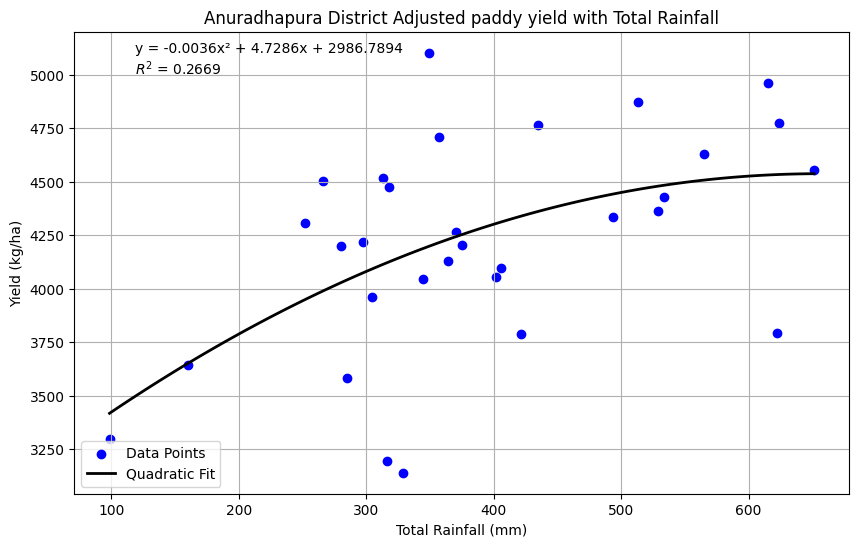

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import r2_score

# Define the features (X) and target (y) variables
X = data['Anuradhapura Yala Total Rainfall']  # Independent variable (Precipitation)
y = data['Anuradhapura Yala Adjusted Yield (kg/ha)']  # Dependent variable (Rice Yield)

# Create quadratic term (X^2)
X_quad = X ** 2

# Combine features into a DataFrame
X_df = pd.DataFrame({'Rainfall': X, 'Rainfall^2': X_quad})

# Add a constant term for the intercept
X_df = sm.add_constant(X_df)

# Fit the quadratic regression model
model = sm.OLS(y, X_df).fit()

# Make predictions
predictions = model.predict(X_df)

# Extract regression coefficients
a, b, c = model.params  # Intercept, linear term, quadratic term
std_err = model.bse  # Standard Errors
t_values = model.tvalues  # t-values
p_values = model.pvalues  # p-values

# Calculate R-squared manually
r_squared = r2_score(y, predictions)

# Print regression results with line breaks for clarity
print("\nQuadratic Regression Results:\n")
print(model.summary())

print("\nEquation: y = {:.4f}x² + {:.4f}x + {:.4f}\n".format(c, b, a))
print("R² = {:.4f}\n".format(r_squared))
print("Intercept (a) = {:.4f}, Std Error = {:.4f}, t-value = {:.4f}, p-value = {:.4f}\n".format(a, std_err[0], t_values[0], p_values[0]))
print("Linear Coeff (b) = {:.4f}, Std Error = {:.4f}, t-value = {:.4f}, p-value = {:.4f}\n".format(b, std_err[1], t_values[1], p_values[1]))
print("Quadratic Coeff (c) = {:.4f}, Std Error = {:.4f}, t-value = {:.4f}, p-value = {:.4f}\n".format(c, std_err[2], t_values[2], p_values[2]))

# Increase plot size
plt.figure(figsize=(10, 6))  # Increased figure size

# Scatter plot of data points
plt.scatter(X, y, color='blue', label='Data Points')

# Sort X values for smooth curve
X_sorted = np.linspace(X.min(), X.max(), 100)
X_sorted_df = pd.DataFrame({'Rainfall': X_sorted, 'Rainfall^2': X_sorted ** 2})
X_sorted_df = sm.add_constant(X_sorted_df)

# Predicted quadratic regression line
plt.plot(X_sorted, model.predict(X_sorted_df), color='black', linewidth=2, label='Quadratic Fit')

# Display equation and R² value with a smaller font size
eq_text = f"y = {c:.4f}x² + {b:.4f}x + {a:.4f}\n$R^2$ = {r_squared:.4f}"
plt.text(X.min() + 20, y.max() - 100, eq_text, fontsize=10, color="black")  # Adjusted position

# Labels and title
plt.xlabel("Total Rainfall (mm)")
plt.ylabel("Yield (kg/ha)")
plt.title("Anuradhapura District Adjusted paddy yield with Total Rainfall")
plt.legend()
plt.grid(True)

# Show plot
plt.show()



Linear Regression Results:

                                       OLS Regression Results                                      
Dep. Variable:     Polonnaruwa Yala Adjusted Yield (kg/ha)   R-squared:                       0.366
Model:                                                 OLS   Adj. R-squared:                  0.344
Method:                                      Least Squares   F-statistic:                     16.73
Date:                                     Wed, 19 Mar 2025   Prob (F-statistic):           0.000313
Time:                                             09:16:30   Log-Likelihood:                -215.64
No. Observations:                                       31   AIC:                             435.3
Df Residuals:                                           29   BIC:                             438.2
Df Model:                                                1                                         
Covariance Type:                                 nonrobust             

<ipython-input-21-319e2b006920>:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("a = {:.4f}, Std Error = {:.4f}, t-value = {:.4f}, p-value = {:.4f}\n".format(a, std_err[0], t_values[0], p_values[0]))
<ipython-input-21-319e2b006920>:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("b = {:.4f}, Std Error = {:.4f}, t-value = {:.4f}, p-value = {:.4f}\n".format(b, std_err[1], t_values[1], p_values[1]))


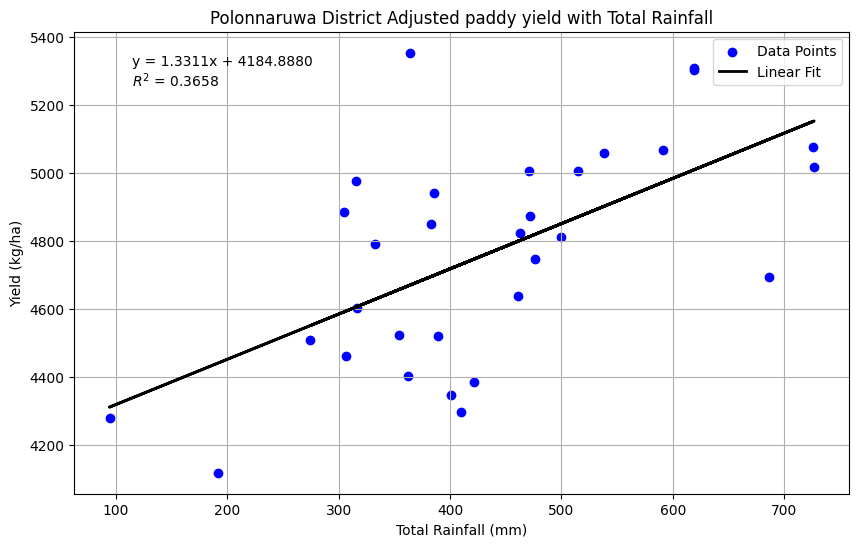

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import r2_score

# Define the features (X) and target (y) variables
X = data['Polonnaruwa Yala Total Rainfall']  # Independent variable (Precipitation)
y = data['Polonnaruwa Yala Adjusted Yield (kg/ha)']  # Dependent variable (Rice Yield)

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Make predictions
predictions = model.predict(X)

# Extract regression coefficients
a, b = model.params  # Intercept and slope
std_err = model.bse  # Standard Errors
t_values = model.tvalues  # t-values
p_values = model.pvalues  # p-values

# Calculate R-squared manually
r_squared = r2_score(y, predictions)

# Print regression results with line breaks for clarity
print("\nLinear Regression Results:\n")
print(model.summary())

print("\nEquation: y = {:.4f}x + {:.4f}\n".format(b, a))
print("R² = {:.4f}\n".format(r_squared))
print("a = {:.4f}, Std Error = {:.4f}, t-value = {:.4f}, p-value = {:.4f}\n".format(a, std_err[0], t_values[0], p_values[0]))
print("b = {:.4f}, Std Error = {:.4f}, t-value = {:.4f}, p-value = {:.4f}\n".format(b, std_err[1], t_values[1], p_values[1]))

# Increase plot size
plt.figure(figsize=(10, 6))  # Increased figure size

# Plot the regression line
plt.scatter(X['Polonnaruwa Yala Total Rainfall'], y, color='blue', label='Data Points')
plt.plot(X['Polonnaruwa Yala Total Rainfall'], predictions, color='black', linewidth=2, label='Linear Fit')

# Display equation and R² value with a smaller font size
eq_text = f"y = {b:.4f}x + {a:.4f}\n$R^2$ = {r_squared:.4f}"
plt.text(X['Polonnaruwa Yala Total Rainfall'].min() + 20, y.max() - 100, eq_text, fontsize=10, color="black")  # Adjusted position

# Labels and title
plt.xlabel("Total Rainfall (mm)")
plt.ylabel("Yield (kg/ha)")
plt.title("Polonnaruwa District Adjusted paddy yield with Total Rainfall")
plt.legend()
plt.grid(True)

# Show plot
plt.show()



Quadratic Regression Results:

                                       OLS Regression Results                                      
Dep. Variable:     Polonnaruwa Yala Adjusted Yield (kg/ha)   R-squared:                       0.378
Model:                                                 OLS   Adj. R-squared:                  0.333
Method:                                      Least Squares   F-statistic:                     8.503
Date:                                     Wed, 19 Mar 2025   Prob (F-statistic):            0.00130
Time:                                             09:16:30   Log-Likelihood:                -215.35
No. Observations:                                       31   AIC:                             436.7
Df Residuals:                                           28   BIC:                             441.0
Df Model:                                                2                                         
Covariance Type:                                 nonrobust          

<ipython-input-22-0d0a869e7416>:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Intercept (a) = {:.4f}, Std Error = {:.4f}, t-value = {:.4f}, p-value = {:.4f}\n".format(a, std_err[0], t_values[0], p_values[0]))
<ipython-input-22-0d0a869e7416>:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Linear Coeff (b) = {:.4f}, Std Error = {:.4f}, t-value = {:.4f}, p-value = {:.4f}\n".format(b, std_err[1], t_values[1], p_values[1]))
<ipython-input-22-0d0a869e7416>:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

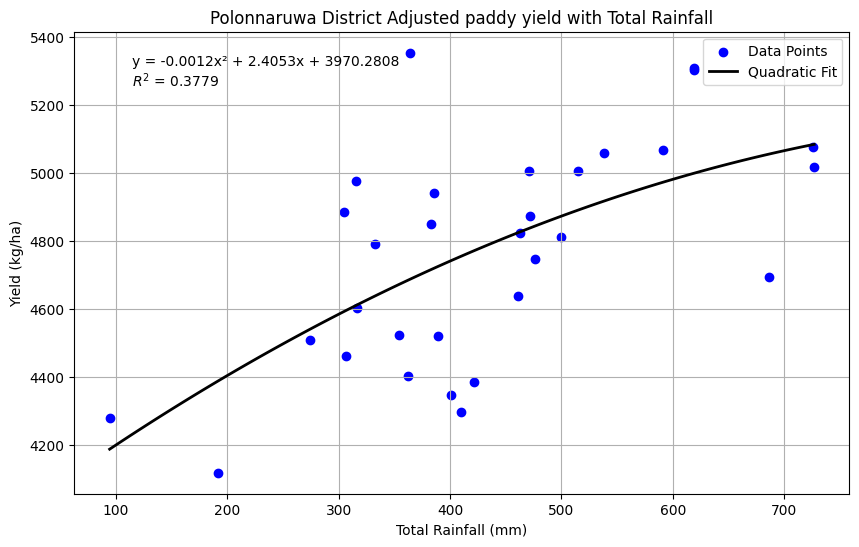

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import r2_score

# Define the features (X) and target (y) variables
X = data['Polonnaruwa Yala Total Rainfall']  # Independent variable (Precipitation)
y = data['Polonnaruwa Yala Adjusted Yield (kg/ha)']  # Dependent variable (Rice Yield)

# Create quadratic term (X^2)
X_quad = X ** 2

# Combine features into a DataFrame
X_df = pd.DataFrame({'Rainfall': X, 'Rainfall^2': X_quad})

# Add a constant term for the intercept
X_df = sm.add_constant(X_df)

# Fit the quadratic regression model
model = sm.OLS(y, X_df).fit()

# Make predictions
predictions = model.predict(X_df)

# Extract regression coefficients
a, b, c = model.params  # Intercept, linear term, quadratic term
std_err = model.bse  # Standard Errors
t_values = model.tvalues  # t-values
p_values = model.pvalues  # p-values

# Calculate R-squared manually
r_squared = r2_score(y, predictions)

# Print regression results with line breaks for clarity
print("\nQuadratic Regression Results:\n")
print(model.summary())

print("\nEquation: y = {:.4f}x² + {:.4f}x + {:.4f}\n".format(c, b, a))
print("R² = {:.4f}\n".format(r_squared))
print("Intercept (a) = {:.4f}, Std Error = {:.4f}, t-value = {:.4f}, p-value = {:.4f}\n".format(a, std_err[0], t_values[0], p_values[0]))
print("Linear Coeff (b) = {:.4f}, Std Error = {:.4f}, t-value = {:.4f}, p-value = {:.4f}\n".format(b, std_err[1], t_values[1], p_values[1]))
print("Quadratic Coeff (c) = {:.4f}, Std Error = {:.4f}, t-value = {:.4f}, p-value = {:.4f}\n".format(c, std_err[2], t_values[2], p_values[2]))

# Increase plot size
plt.figure(figsize=(10, 6))  # Increased figure size

# Scatter plot of data points
plt.scatter(X, y, color='blue', label='Data Points')

# Sort X values for smooth curve
X_sorted = np.linspace(X.min(), X.max(), 100)
X_sorted_df = pd.DataFrame({'Rainfall': X_sorted, 'Rainfall^2': X_sorted ** 2})
X_sorted_df = sm.add_constant(X_sorted_df)

# Predicted quadratic regression line
plt.plot(X_sorted, model.predict(X_sorted_df), color='black', linewidth=2, label='Quadratic Fit')

# Display equation and R² value with a smaller font size
eq_text = f"y = {c:.4f}x² + {b:.4f}x + {a:.4f}\n$R^2$ = {r_squared:.4f}"
plt.text(X.min() + 20, y.max() - 100, eq_text, fontsize=10, color="black")  # Adjusted position

# Labels and title
plt.xlabel("Total Rainfall (mm)")
plt.ylabel("Yield (kg/ha)")
plt.title("Polonnaruwa District Adjusted paddy yield with Total Rainfall")
plt.legend()
plt.grid(True)

# Show plot
plt.show()
